#Nombres: 

#Quispe Sucullani Jose David
 
 	
#Luis Rolando Calcina Quispe 

#Gutierrez Murillo Gerzon

#Carrera: Ing Ciencias de la computacion 
         
#Gitlab: https://github.com/luis1308-5687/Laboratorio-5-IA/tree/main




## PUNTO 1 :
#### 1.   Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 20, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.
#### 2.   Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo.




### Iniciamos creando una función que nos ayudará con la generación de centroides aleatorios separados entre sí, ahora permitiendo entre 1 y 20 centroides.

In [1]:
import numpy as np

def generate_centroids(num_centroids, spread=10):
    centroids = []  # Lista para almacenar los centroides generados
    for _ in range(num_centroids):
        # Genera un nuevo centroide aleatorio
        while True:
            new_centroid = np.random.rand(2) * spread  # Genera un punto aleatorio en 2D
            # Verifica que el nuevo centroide esté a más de 2.5 unidades de los ya generados
            if all(np.linalg.norm(new_centroid - np.array(c)) > 2.5 for c in centroids):
                centroids.append(new_centroid)  # Añade el nuevo centroide a la lista
                break  # Sale del bucle si el centroide es válido
    return np.array(centroids)  # Devuelve los centroides como un array de NumPy


### Usamos la función para generar centroides aleatorios y creamos nuestros datos sintéticos (X), ahora permitiendo entre 1 y 20 centroides.

In [ ]:
from sklearn.datasets import make_blobs
import random

# Definir el número de centroides entre 1 y 20
num_centroids = random.randint(1, 20)
print(f"Generando {num_centroids} centroides.")

# Generar los centroides
blob_centers = generate_centroids(num_centroids)

# Definir la desviación estándar para cada cluster
blob_std = np.array([0.5] * num_centroids) 

# Generar los datos sintéticos
X, y = make_blobs(n_samples=20000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Mostramos los centroides generados.
print("Centroides generados:")
print(blob_centers)

Generando 4 centroides.
Centroides generados:
[[5.54645812 6.6016651 ]
 [8.20089086 9.60608581]
 [5.71356662 3.17159035]
 [8.88670499 6.19113112]]


### Graficamos los datos generados (x1, x2)

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    #plt.scatter(blob_centers[:, 0], blob_centers[:, 1],
    #        s=200, color='red', marker='X')  # Mostrar los centroides

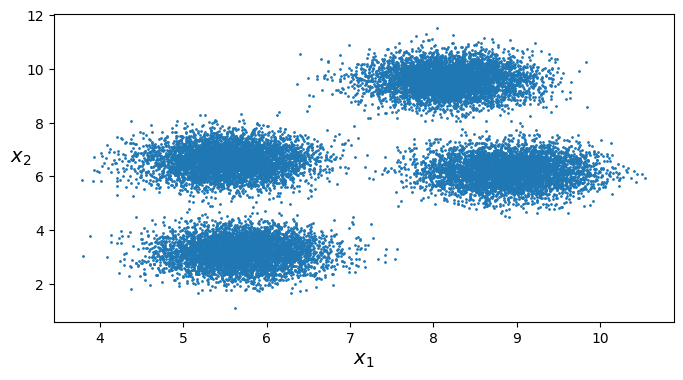

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Graficamos los datos generados pero ahora juntamente con los centroides ya entrenados.

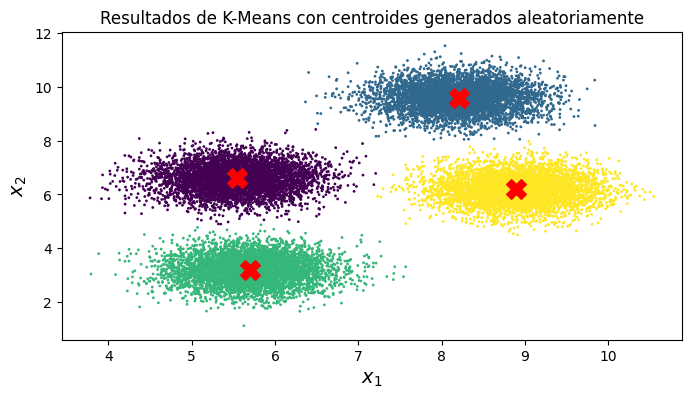

array([0, 3, 1, ..., 0, 2, 3], dtype=int32)

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=num_centroids, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualizar los resultados
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, color='red', marker='X')  # Mostrar los centroides
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.title("Resultados de K-Means con centroides generados aleatoriamente")
plt.show()
y_pred


In [6]:
# Centroides ya entrenados.
kmeans.cluster_centers_

array([[5.54450731, 6.59431772],
       [8.20503349, 9.59478153],
       [5.69844623, 3.17990249],
       [8.89528543, 6.1973804 ]])

### Graficamos las fronteras de decision entre clusters, esto para ver como fue la division del espacio.

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)# aka definimos la funciona para poder fraficar las frontes en dos cordenadas de X y y q es 0 y 1

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'): # en esta funcion se dibuja los centroides del codigo en si
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

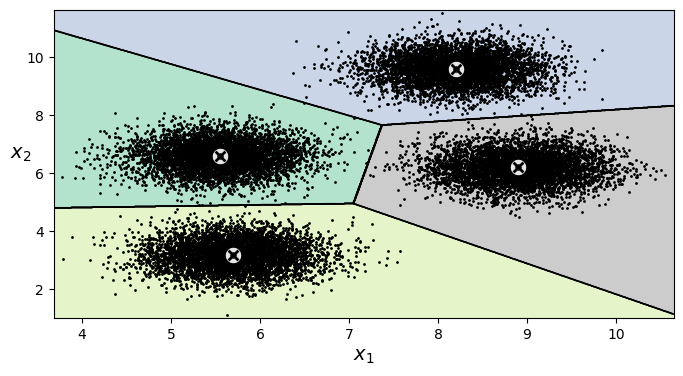

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Entrenamos tres modelos K-Means con 1, 2 y 3 iteraciones, usando k-means++ y el algoritmo elkan para comparar los resultados de cada iteración.

In [9]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=1, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=4, n_init=1, random_state=1)

### Graficamos la evolucion del algoritmo K-Means durante las 3 interaciones que hicimos anteriormente. Esto para asi ver cómo los centroides y las fronteras de decisión cambian conforme el algoritmo ajusta los grupos

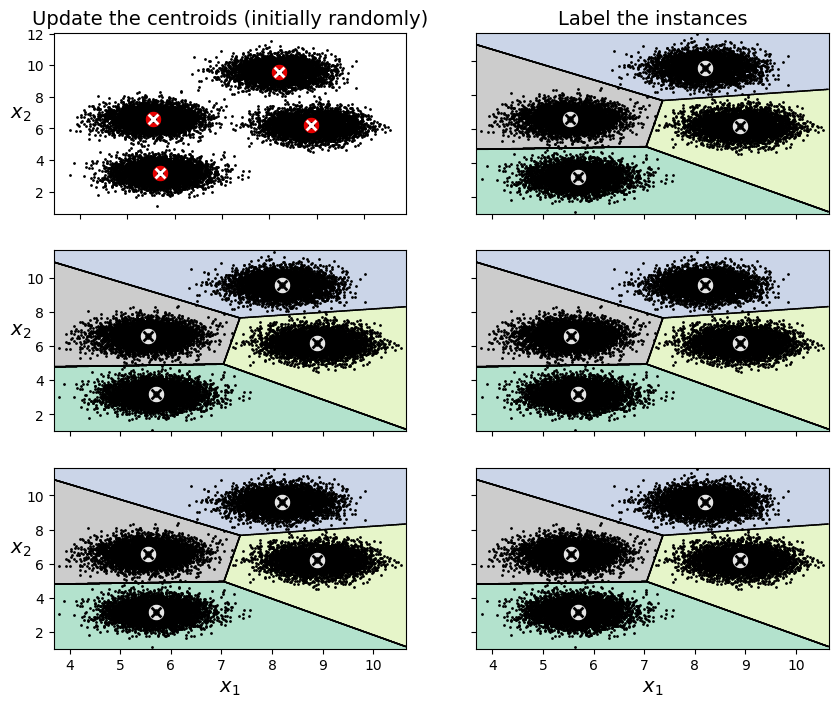

In [10]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### Lo que haremos ahora sera comparar 2 modelos K-Means con diferentes inicializaciones aleatorias, mostrando sus respectivas fronteras de decisión. Esto permite observar cómo afecta la inicialización a los resultados del clustering.

In [11]:
# Función para comparar dos modelos de clustering K-Means en el mismo conjunto de datos
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrena el primer modelo en los datos X
    clusterer1.fit(X)
    # Entrena el segundo modelo en los datos X
    clusterer2.fit(X)

    # Configuración del tamaño de la figura para las gráficas
    plt.figure(figsize=(10, 3.2))

    # Primer subplot: gráfica de las fronteras de decisión del primer modelo
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)  # Función que grafica las fronteras del clusterer
    if title1:
        plt.title(title1, fontsize=14)  # Añade el título si se proporciona uno

    # Segundo subplot: gráfica de las fronteras de decisión del segundo modelo
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)  # Sin etiquetas de eje Y
    if title2:
        plt.title(title2, fontsize=14)  # Añade el título si se proporciona uno

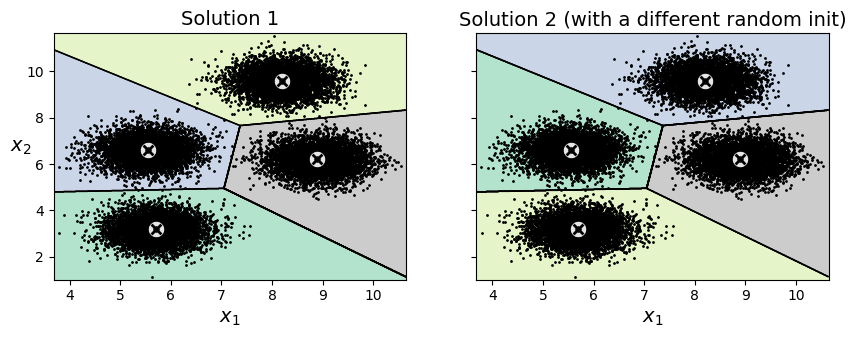

In [12]:
# Configuración de dos modelos K-Means con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=1)
kmeans_rnd_init2 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=20)

# Comparación visual de los dos modelos con diferentes inicializaciones
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

# Muestra las gráficas
plt.show()

### Procedemos a entrenar un modelo K-Means utilizando 10 inicializaciones aleatorias y visualiza las fronteras de decisión del clustering. Esto ayuda a observar la estabilidad y la variabilidad en los resultados del agrupamiento.

In [13]:
# Configuración de un modelo K-Means con 10 inicializaciones aleatorias
kmeans_rnd_10_inits = KMeans(n_clusters=num_centroids, init="random", n_init=10,
                              algorithm="elkan", random_state=11)

# Entrena el modelo K-Means en los datos X
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=10,
       random_state=11)

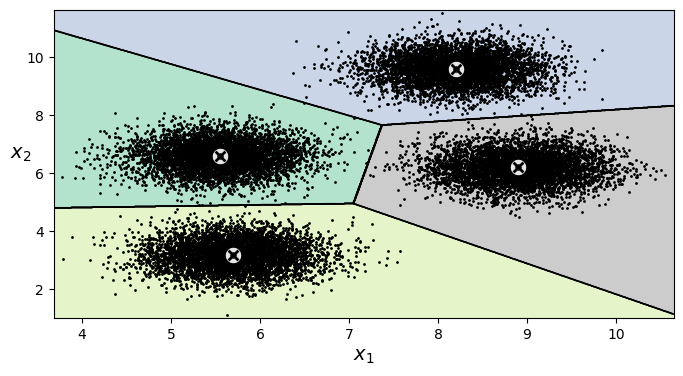

In [14]:
# Configuración de la figura para la visualización de las fronteras de decisión
plt.figure(figsize=(8, 4))
# Función que grafica las fronteras de decisión del modelo K-Means
plot_decision_boundaries(kmeans_rnd_10_inits, X)

# Muestra la gráfica generada
plt.show()

### Mostramos el Silhouette Score para evaluar la calidad del clustering generado por el modelo K-Means. Un valor más alto indica que los clusters están bien definidos y son distintos entre sí.

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.7305523706311955)

### Graficamos el Silhouette Score y el método del codo para evaluar la calidad del modelo KMeans con diferentes valores de k (número de clusters).

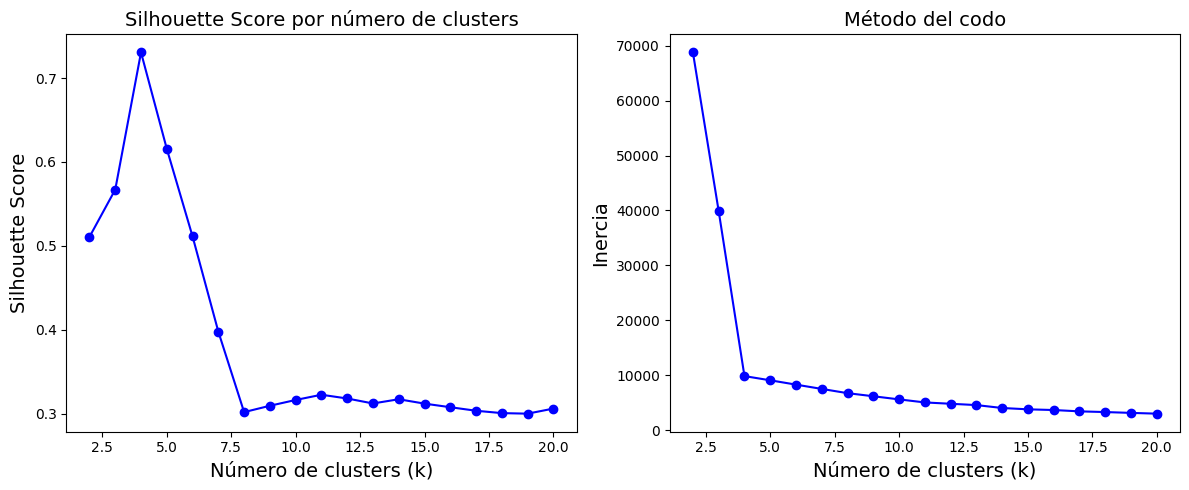

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calcula los modelos y las métricas para k desde 2 hasta 20
k_values = range(2, 21)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_values]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]
inertia_scores = [model.inertia_ for model in kmeans_per_k]

# Graficar el Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score por número de clusters", fontsize=14)

# Graficar el método del codo
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del codo", fontsize=14)

plt.tight_layout()
plt.show()

### Generamos graficos de coeficientes de silueta para diferentes valores de k (número de clusters) en el modelo K-Means. Cada gráfico muestra la distribución de los coeficientes de silueta por cluster, lo que permite visualizar la calidad del agrupamiento para cada valor de k.

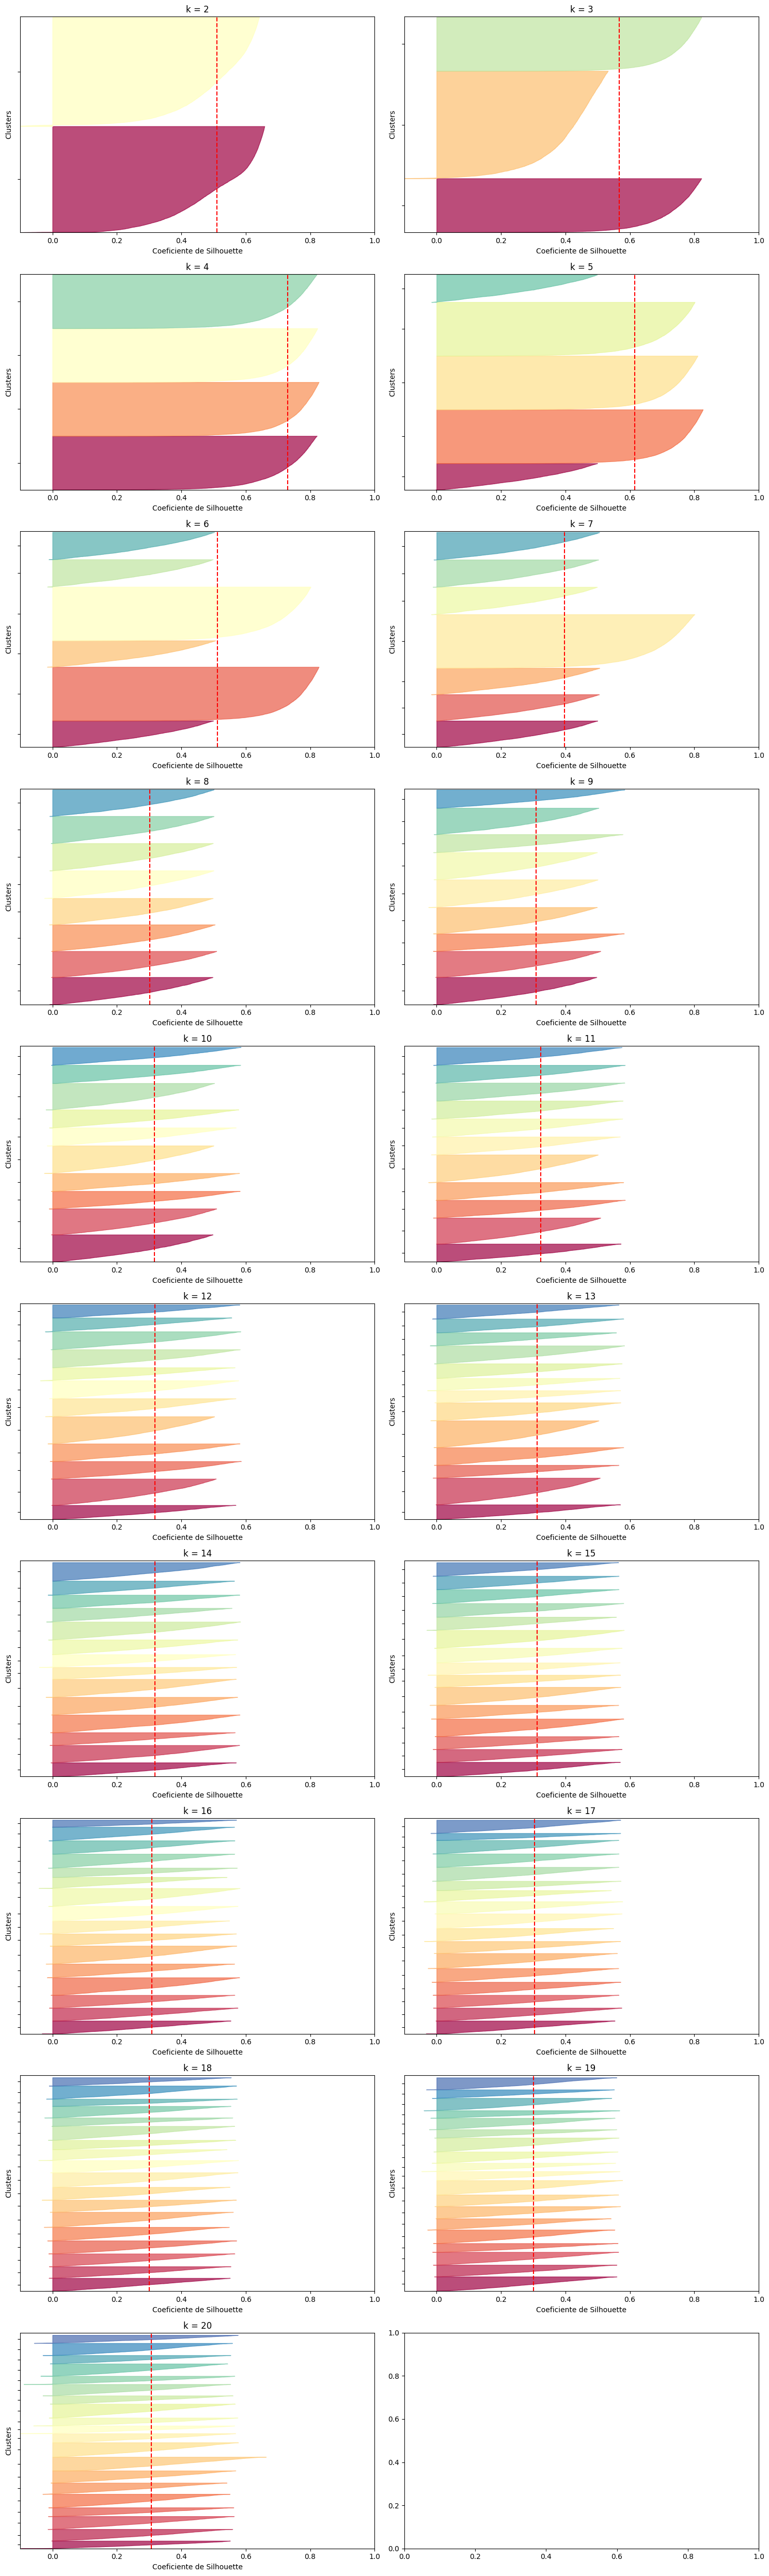

In [17]:
# Importa las métricas necesarias para calcular los coeficientes de silueta
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que ya tienes kmeans_per_k y silhouette_scores calculados

# Obtener el rango de valores de k
k_values = range(2, len(kmeans_per_k) + 2)  # k empieza en 2

# Crear subplots para cada valor de k
num_plots = len(k_values)
num_rows = int(np.ceil(num_plots / 2))  # Calcula el número de filas para subplots
num_cols = 2  # Dos columnas de subplots

# Crea la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.4)  # Ajusta el espacio entre subplots

# Iterar sobre los valores de k y crear gráficos de silueta
for i, k in enumerate(k_values):
    ax = axes[i // num_cols, i % num_cols]  # Obtiene el subplot actual
    y_pred = kmeans_per_k[i].labels_  # Obtiene las etiquetas del modelo K-Means
    silhouette_vals = silhouette_samples(X, y_pred)  # Calcula los coeficientes de silueta

    y_ticks = []
    y_lower, y_upper = 0, 0  # Inicializa límites para los clusters
    for cluster in range(k):
        # Extrae y ordena los coeficientes de silueta para cada cluster
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)  # Actualiza el límite superior
        color = mpl.cm.Spectral(cluster / k)  # Asigna color basado en el cluster
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)  # Grafica el área del cluster
        y_ticks.append((y_lower + y_upper) / 2)  # Añade tick al eje Y
        y_lower = y_upper  # Actualiza el límite inferior

    # Dibuja una línea vertical indicando el promedio del coeficiente de silueta
    ax.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    ax.set_yticks(y_ticks)  # Establece los ticks en el eje Y
    ax.set_yticklabels([])  # Elimina las etiquetas del eje Y
    ax.set_xlim([-0.1, 1])  # Establece límites en el eje X
    ax.set_ylim([0, len(X) + (k + 1) * 10])  # Establece límites en el eje Y
    ax.set_title(f"k = {k}")  # Título del subplot
    ax.set_xlabel("Coeficiente de Silhouette")  # Etiqueta del eje X
    ax.set_ylabel("Clusters")  # Etiqueta del eje Y

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()  # Muestra la figura


### Demostración de la efectividad del modelo.

In [18]:
# Mostrar el índice de silueta
print(f'Índice de Silueta: {silhouette_score(X, kmeans.labels_)}')

Índice de Silueta: 0.7305523706311955


### Este valor está entre 0 y 1, donde valores cercanos a 1 (valor > 0.5) indican que los puntos están bien agrupados y distanciados de otros clusters.